 # 3. PyTorch Workflow

In [ ]:
what_we_are_covering = {1: "data{prepare and load}",
                        2: "build model",
                        3: "fitting the model to data (training)",
                        4: "making predictions and evaluating a model (inference)",
                        5: "saving and loading a model",
                        6: "putting it all together"}

what_we_are_covering

{1: 'data{prepare and load}',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

#### To learn more about PyTorch's neural networks - https://pytorch.org/docs/stable/nn.html

In [ ]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural networks.
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

## 1. Data preparing and loading

Data can be anything in ML.
* Excel spreadhseet
* Images of any kind
* Videos
* Audio
* DNA
* Text

ML is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

## y=wx+b
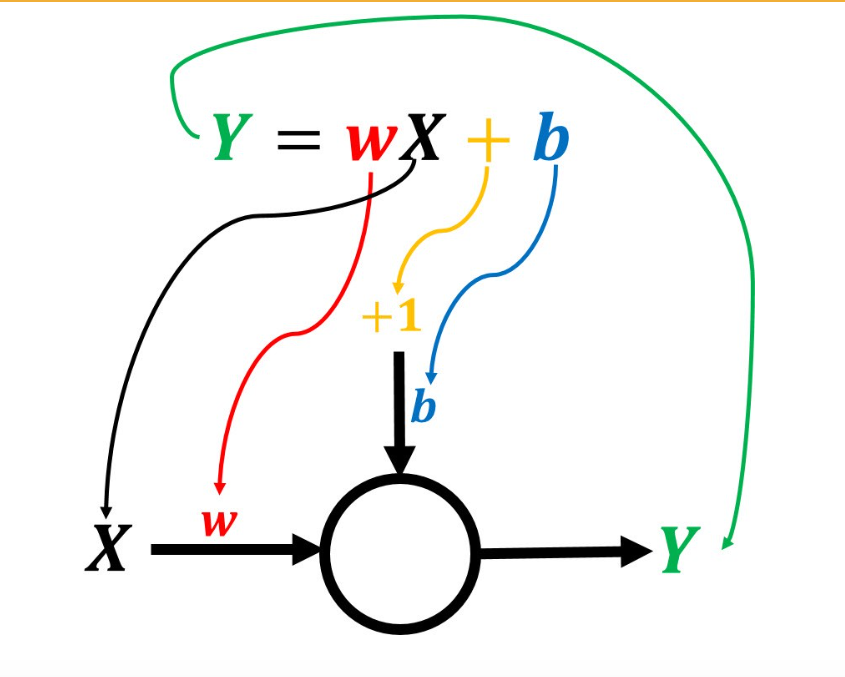

## Neuron with multiple inputs
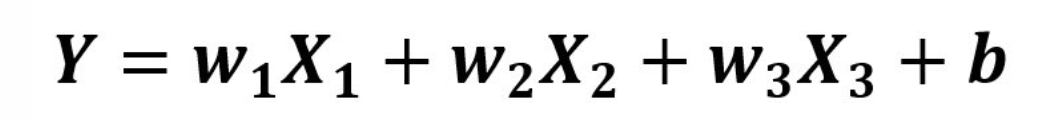

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets

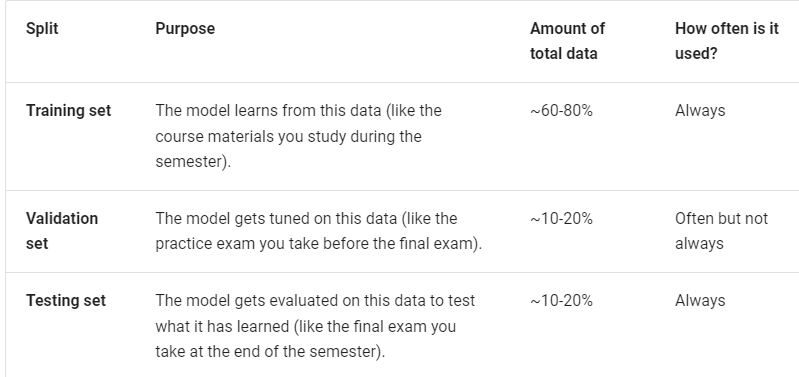

Let's create a training and test set with our data.

In [ ]:
# Create a train-test split
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto come in!

"Visualize, visualize, and visualize!!!"


In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data, test data, and predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

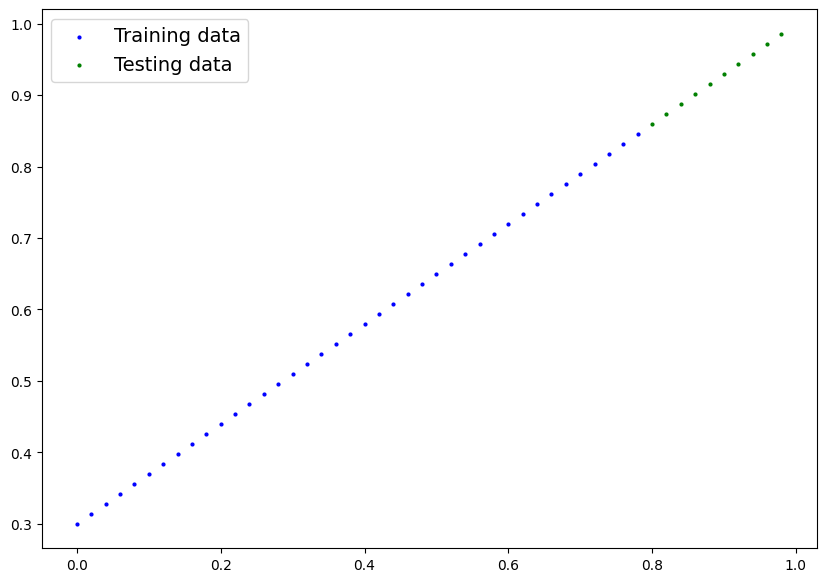

In [ ]:
plot_predictions()

## 2. Build model

Our first PyTorch model!

OOP in Python is important
https://realpython.com/python3-object-oriented-programming/

**What our model does:**
* Start with random vaslues (weight and bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias vaslues we used to create the data)

How does it do so?
1. Gradient Descent
2. Backpropagation

To ensure **gradient descent** and **backpropagation** in PyTorch, there are specific **keywords and mechanisms** you use in your code. Here's a list of the essential ones and their roles:

---

### **1. `requires_grad`**
- **Purpose**: Ensures that PyTorch tracks operations on tensors for gradient computation.
- **Explanation**:
  - Any tensor with `requires_grad=True` will be included in the computational graph.
  - During the backward pass, PyTorch calculates gradients for such tensors automatically.
- **Where it appears**:
  ```python
  self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  ```

---

### **2. `nn.Parameter`**
- **Purpose**: Wraps a tensor so that it is automatically registered as a model parameter and tracked for optimization.
- **Explanation**:
  - All `nn.Parameter` objects in a model are added to the model’s `parameters()` list.
  - This makes them accessible to optimizers like `torch.optim.SGD` or `torch.optim.Adam`.
- **Where it appears**:
  ```python
  self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  ```

---

### **3. `loss.backward()`**
- **Purpose**: Computes the gradients of the loss with respect to all model parameters. It is the main one for `Backpropagation`.
- **Explanation**:
  - During the backward pass, PyTorch calculates gradients using the **chain rule** for all parameters involved in the computation of the loss.
  - These gradients are stored in the `.grad` attribute of each parameter.
- **Where it appears**:
  ```python
  loss.backward()
  ```

---

### **4. `optimizer.step()`**
- **Purpose**: Updates the model parameters using their gradients. It is the main one for `Gradient Descent`.

- **Where it appears**:
  ```python
  optimizer.step()
  ```

---

### **5. `optimizer.zero_grad()`**
- **Purpose**: Clears the gradients of all parameters before the next iteration.
- **Explanation**:
  - By default, PyTorch accumulates gradients (i.e., adds new gradients to the previous ones). To prevent this, you need to zero out the gradients before each optimization step.
- **Where it appears**:
  ```python
  optimizer.zero_grad()
  ```

---

### **6. `torch.autograd` (Automatic Differentiation)**
- **Purpose**: PyTorch's engine for building computational graphs and calculating gradients.
- **Explanation**:
  - Automatically tracks operations on tensors with `requires_grad=True` to construct a dynamic computational graph.
  - Used indirectly through `loss.backward()` to compute gradients.
- **Where it is used**:
  - Built into PyTorch; you don't need to call it directly.

---

### **7. `model.parameters()`**
- **Purpose**: Retrieves all trainable parameters in the model for optimization.
- **Explanation**:
  - PyTorch tracks all parameters registered in `nn.Module` (e.g., `nn.Parameter`) and includes them in `model.parameters()`.
- **Where it appears**:
  ```python
  optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
  ```

---

- **`loss.backward()`** (backpropagation) is used in combination with:  
  - `requires_grad=True` (to track gradients for parameters).  
  - `optimizer.zero_grad()` (to reset gradients before backpropagation).

- **`optimizer.step()`** (gradient descent) is used in combination with:  
  - `model.parameters()` (to access the parameters being optimized).  
  - `optimizer.zero_grad()` and `loss.backward()` (to ensure updated gradients are applied).

---

### **Keywords**
| **Keyword**         | **Purpose**                                     |
|----------------------|------------------------------------------------|
| `requires_grad`      | Enables gradient computation for tensors.      |
| `nn.Parameter`       | Registers tensors as trainable model parameters.|
| `loss.backward()`    | Computes gradients via backpropagation.        |
| `optimizer.step()`   | Updates model parameters using gradients.      |
| `optimizer.zero_grad()` | Clears gradients to prevent accumulation.      |
| `model.parameters()` | Retrieves all trainable model parameters.      |

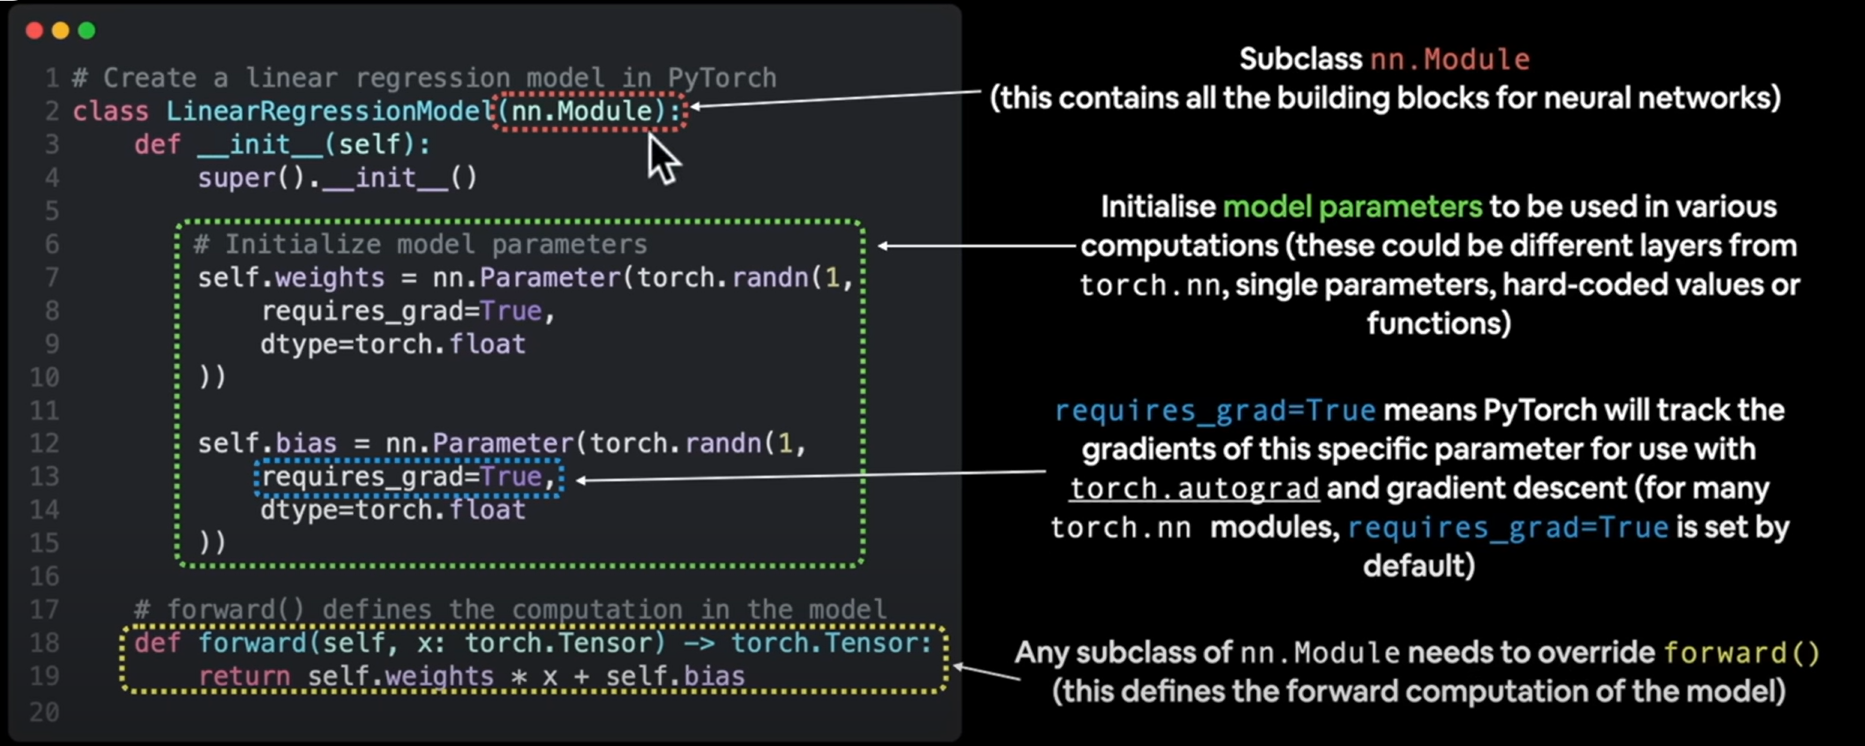

In [ ]:
from torch import nn

# Create Linear Regression model class
class LinearRegressionModel (nn.Module): #<- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
      super().__init__()
      self.weights = nn.Parameter(torch.randn(1,  # start with random weight and try to adjust with ideal weight
                                              requires_grad=True,  # can this parameter be updated with gradient descent
                                              dtype=torch.float))  # PyTorch most commom datatype float32

      self.bias = nn.Parameter(torch.randn(1, # start with random weight and try to adjust with ideal weight
                                           requires_grad=True,  # can this parameter be updated with gradient descent
                                           dtype=torch.float))  # PyTorch most commom datatype float32

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  #<- "x" is the input data
      return self.weights * x + self.bias  # This is the linear-regression formula


The class `LinearRegressionModel` inherits from `nn.Module`, which is a parent class provided by PyTorch.
By calling `super().__init__()`, you are explicitly initializing all the features and functionality provided by `nn.Module`.


### **What is `super().__init__()`?**

In Python, `super()` is used to call a method from the **parent class** (also known as the superclass) in an inheritance hierarchy.

In this case:
- The class `LinearRegressionModel` inherits from `nn.Module`, which is a parent class provided by PyTorch.
- By calling `super().__init__()`, you are explicitly initializing all the features and functionality provided by `nn.Module`.

---

### **Why is `super().__init__()` needed here?**

The `nn.Module` class (your parent class) does a lot of work behind the scenes to make building neural networks easier. When you call `super().__init__()`, it ensures the following:

1. **Registers your model's parameters**:
   - PyTorch needs to track all parameters (e.g., `self.weights` and `self.bias`) so that they can be optimized.
   - Without `super().__init__()`, the `nn.Module` class wouldn’t know that `self.weights` and `self.bias` are trainable parameters, and you wouldn't be able to call methods like `model.parameters()` to get them.

2. **Handles internal features of `nn.Module`**:
   - `nn.Module` provides tools like `model.eval()`, `model.train()`, and `state_dict()` for saving and loading models. These tools won’t work unless the parent class is properly initialized.

3. **Ensures the model works in PyTorch's ecosystem**:
   - PyTorch expects all models to be subclasses of `nn.Module` and assumes that `super().__init__()` has been called to initialize its internal functionality.
   - Skipping `super().__init__()` can cause subtle bugs where your model doesn't behave as expected (e.g., layers not being properly registered).

### **What Happens If You Don’t Use `super().__init__()`?**

1. **Parameters won’t be registered**:
   - PyTorch won’t know that `self.weights` and `self.bias` are part of the model, and they won’t show up in `model.parameters()`.

2. **Optimization won’t work**:
   - Since the optimizer relies on `model.parameters()` to get the list of parameters, it won't update anything.

3. **Other functionality may break**:
   - Methods like `state_dict()` (used for saving models) or hooks won’t work properly because they depend on the `nn.Module` initialization.


PyTorch model building essentials

* `torch.nn` - contains all of buildings for computational graphs (a neural network can be considered as a computational graph)
* `torch.nn.Parameter` - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us.
* `torch.nn.Module` - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this where the optimizers in PyTorch live, they will help with gradient descent.
* `def forward()` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet:
https://pytorch.org/tutorials/beginner/ptcheat.html

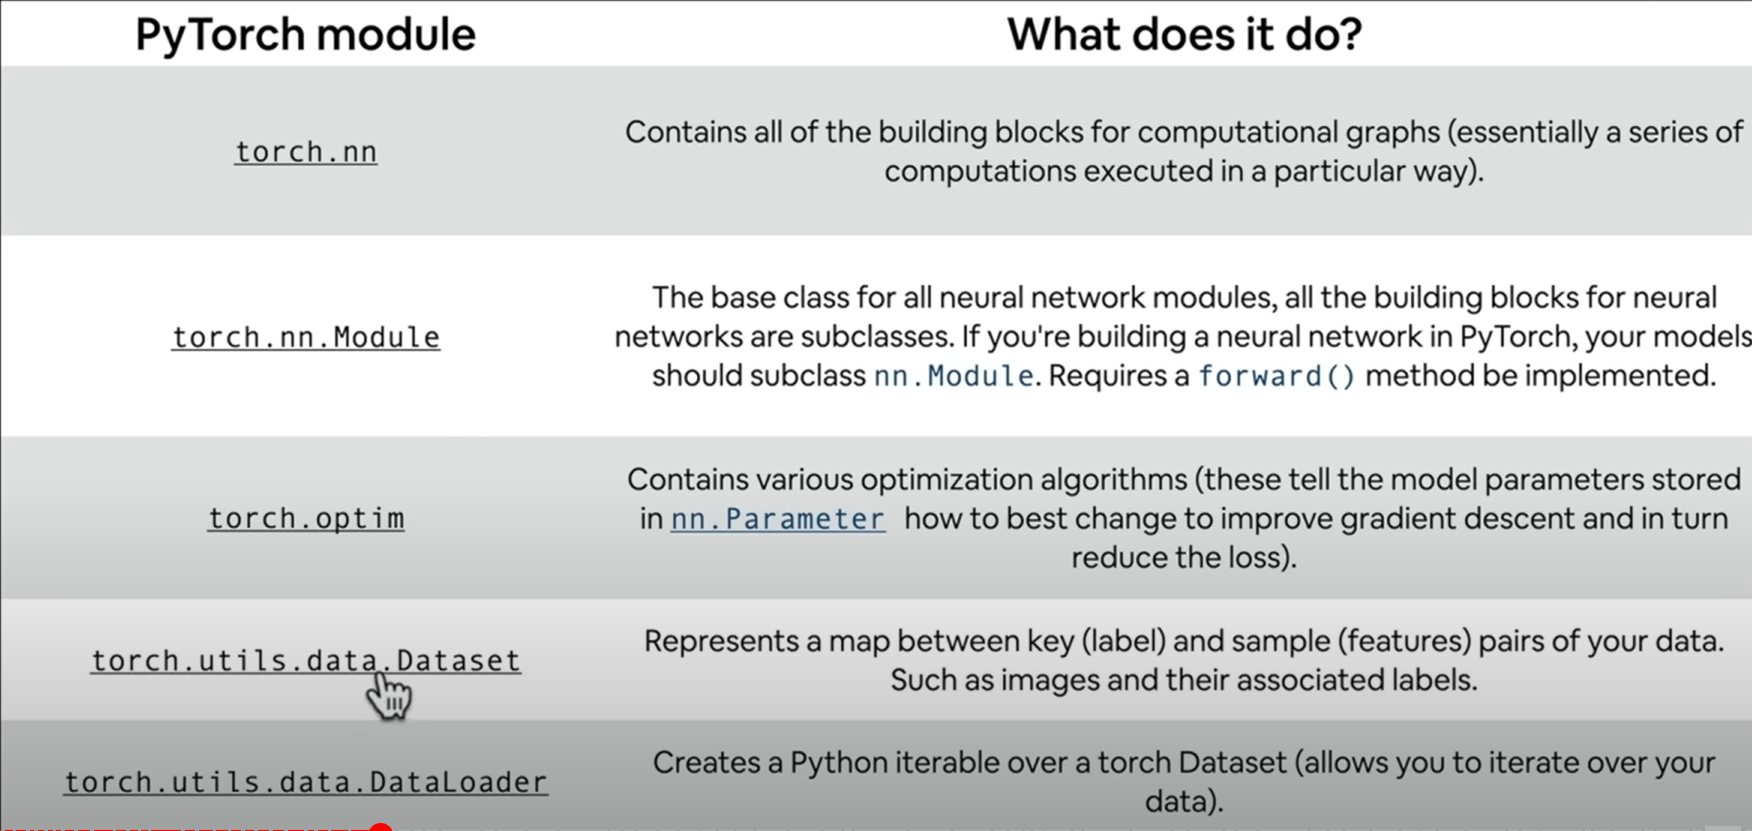

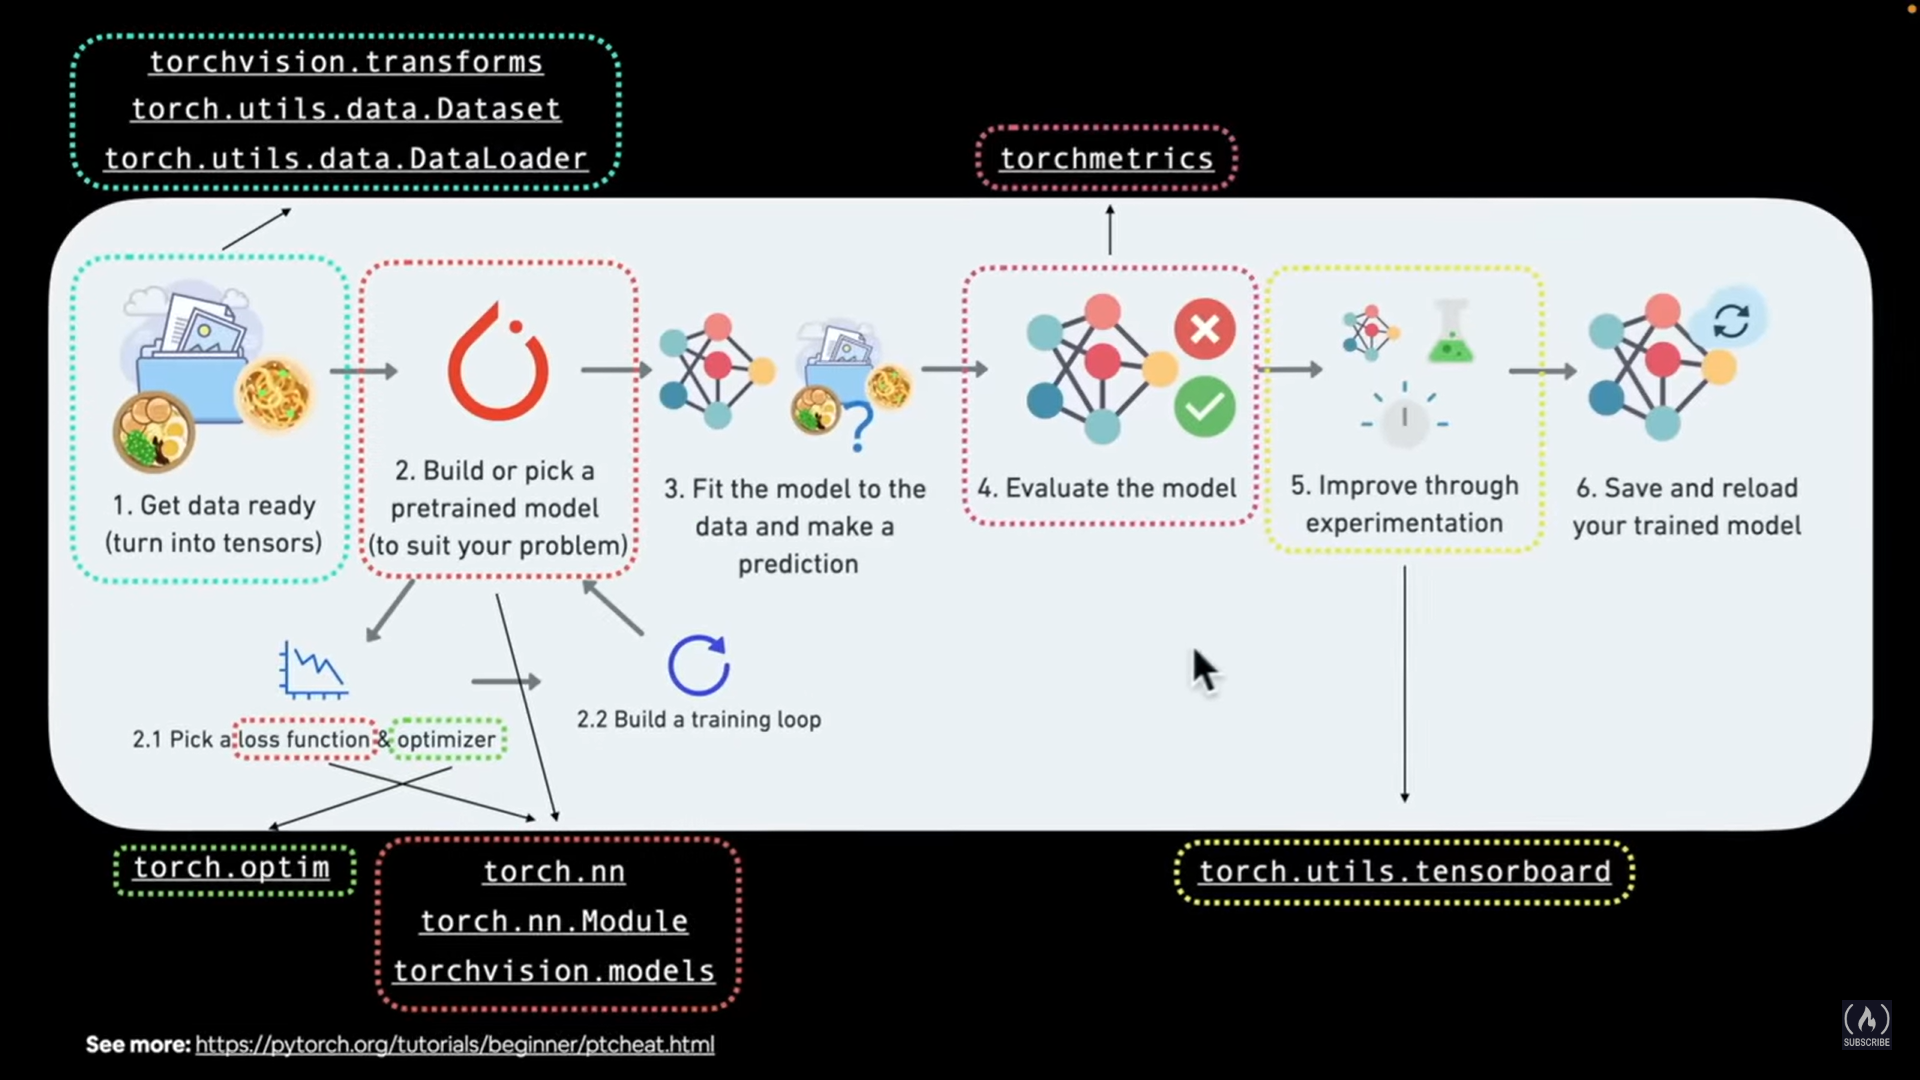

# Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our parameters or what's inside our model using `.parameters()`

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's hgoing to run it through the `forward()` method.

### **Why Use `torch.inference_mode()`?**
- **`torch.inference_mode()`** is a context manager that:
  - Disables gradient computation to save memory and speed up computations during inference (i.e., testing or predicting).
  - It is preferred over `torch.no_grad()` in newer PyTorch versions for inference scenarios.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

# You can do the same with torch.no_grad(), however, torch.inference_mode() is preferred because it is less computationally expensive.
# with torch.no_grad():
#   y_preds = model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

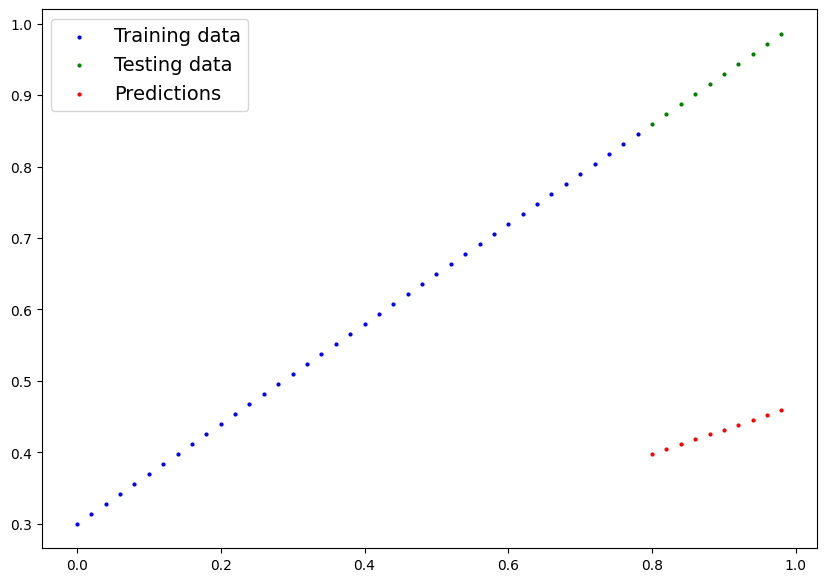

In [ ]:
plot_predictions(predictions=y_preds)

An ideal model would have the red dots on top of the green dots

# 3. Train the model

The whole idea of training is for a model to kove from some *unknown* parameters (these may be random) to some *known* parameters.
Or in other words from a poor representation of data to a better representation of data.

One way to measure how poor or how bad the models predict, one can use a loss function.

* NOTE: Loss function may also be called cost fucntion or criterion in different areas.
For our case we will refer to it as loss function.

* **Loss function:** A function to measure how wrong your model's predictions are to the ideal output, lower is better. For loss function search for loss functions in the following link:
https://pytorch.org/docs/stable/nn.html

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight and bias) to improve the loss function.
Inside the optimizer you'll often have to set two parameters:

  * `params` - the model parameters you'd like to optimize, for example `params = model_0.parameters()`
  * `lr (Learning rate)` - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step (a small `lr` results in small changes, a large `lr` results in large changes)


For optimizers:
https://pytorch.org/docs/stable/optim.html#module-torch.optim


And specifically for PyTorch, we need:
* A training loop
* A testing loop


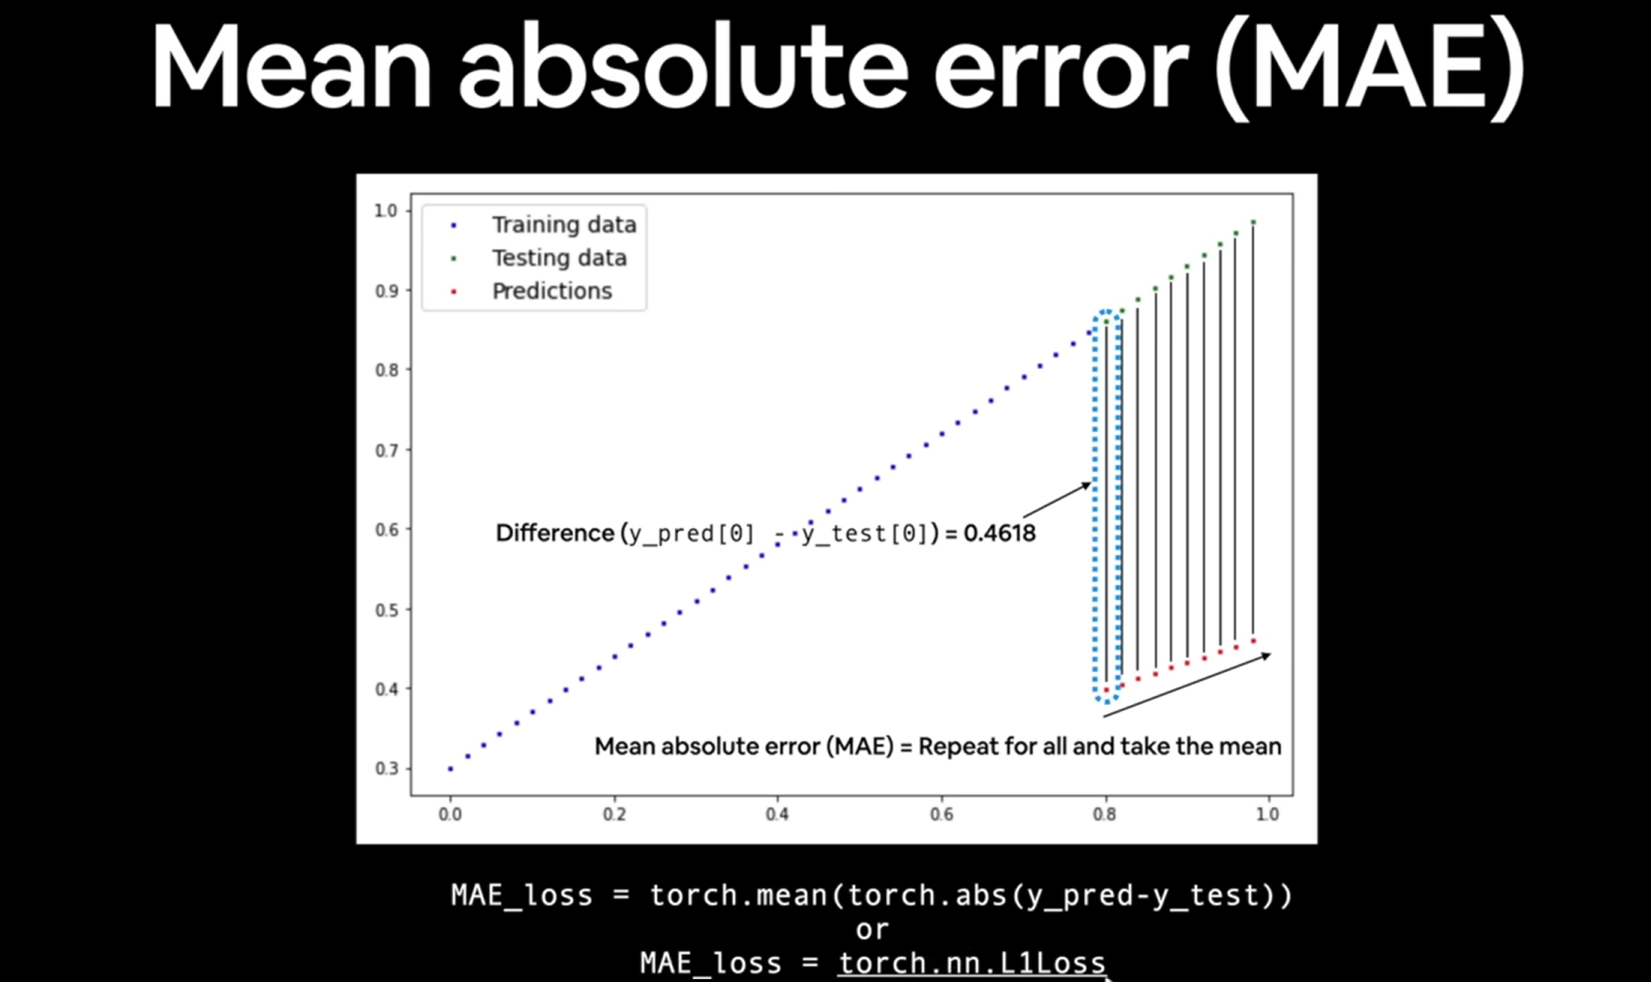

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Check out our model's paarmeters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()             # L1Loss is the MAE - Mean Absolute Error

# Setup an optimizer (stochastic gradient descent - SGD)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate -> possibly the most important hyperparameter you can set

Our model improves by taking random numbers and randomly adjusting them to minimize the loss. Once the loss value is minimized to the minimum possible. Say if we increase the weight it reduces the loss, so it will keep on increasing the weights until the weights no longer reduce the loss. Same thing happens with bias, if it decreases the bias, and the loss increases, so it will increase the bias.

That's how loss function and optimizer work together.

Check out the `loss functions`: https://pytorch.org/docs/stable/nn.html#loss-functions

**Q:** Which loss function and optimizer should I use?

**A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop and testing loop in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and do....
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**).
5. Optimizer - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**).


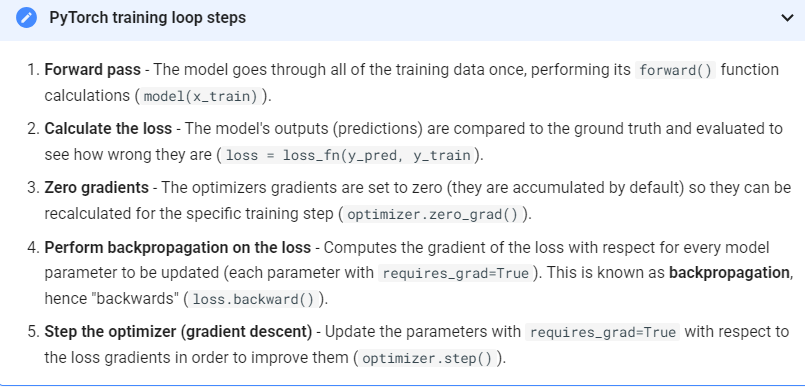

## ***Gradients***

In **Deep Learning (DL)**, a **gradient** refers to the partial derivative of a loss function with respect to a model's parameters (e.g., weights and biases). It indicates how much and in which direction the parameters need to change to minimize the loss function. Gradients are a fundamental concept enabling the model to learn through optimization techniques like **gradient descent**.

---

### **Key Concepts**
1. **Purpose of Gradients**:
   - Gradients help update the model parameters during training.
   - They guide the optimization algorithm (e.g., SGD, Adam) to minimize the loss function.

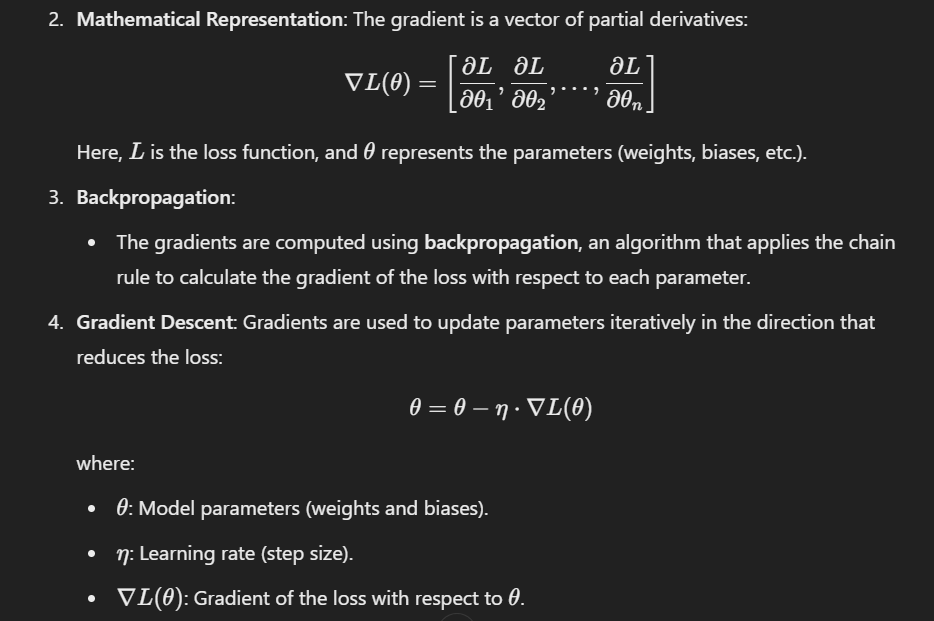
---

### **Role in Training**
1. **Forward Pass**:  
   Compute the output of the model and the loss value.  

2. **Backward Pass**:  
   Compute gradients of the loss with respect to the model's parameters using backpropagation.

3. **Optimization Step**:  
   Use gradients to update the model parameters via gradient descent or its variants.

---

### **Gradient in PyTorch**
In PyTorch, gradients are computed and used as follows:
1. **Enable Gradient Tracking**:  
   Tensors with `requires_grad=True` track operations and gradients.
   ```python
   weight = torch.tensor([1.0], requires_grad=True)
   bias = torch.tensor([0.5], requires_grad=True)
   ```

2. **Compute Gradients**:  
   After a forward pass, call `loss.backward()` to compute gradients.
   ```python
   loss = (y_pred - y_actual).pow(2).mean()
   loss.backward()
   ```

3. **Access Gradients**:  
   The gradients are stored in the `.grad` attribute of each parameter.
   ```python
   print(weight.grad)
   print(bias.grad)
   ```

4. **Update Parameters**:  
   Use an optimizer (e.g., `SGD` or `Adam`) to apply gradient descent and update parameters.
   ```python
   optimizer.step()
   optimizer.zero_grad()  # Reset gradients
   ```

---

### **Intuition**
- **Small Gradients**: Indicate that the parameter is close to the optimal value.  
- **Large Gradients**: Suggest that the parameter is far from the optimal value and requires significant updates.  
- **Zero Gradients**: Either a local minimum or a poorly designed model/loss function.

The purpose of calling `optimizer.zero_grad()` in PyTorch is to **reset the gradients of all the model parameters to zero** before performing a new backpropagation step. This step is crucial for ensuring that gradients from previous iterations don't accumulate and interfere with the current update.

---

### **Why Reset Gradients?**

1. **Gradients Accumulate by Default**:
   In PyTorch, gradients are **accumulated** in the `.grad` attribute of tensors during backpropagation (i.e., when you call `loss.backward()`). This is done because some training workflows (e.g., gradient accumulation across mini-batches) require adding up gradients.

   If you don't reset the gradients using `optimizer.zero_grad()`, the new gradients will be added to the previous ones, leading to incorrect updates.

2. **Prevent Incorrect Parameter Updates**:
   Accumulated gradients result in wrong parameter updates during `optimizer.step()`, which can destabilize training or make it converge to a suboptimal solution.

---

### **When Do You Call `optimizer.zero_grad()`?**

You call `optimizer.zero_grad()` **before** computing gradients for the current forward and backward pass in each training iteration. A typical training loop looks like this:

```python
for epoch in range(num_epochs):
    for batch in dataloader:
        # Zero out gradients from the previous iteration
        optimizer.zero_grad()
        
        # Forward pass
        predictions = model(batch["inputs"])
        
        # Compute loss
        loss = loss_fn(predictions, batch["targets"])
        
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update model parameters using optimizer
        optimizer.step()
```

---

### **What Happens Without `optimizer.zero_grad()`?**

If you skip `optimizer.zero_grad()`, gradients from each batch will accumulate instead of being replaced. Here's an example of the issue:

```python
# Example without zero_grad()
import torch
from torch import nn, optim

# Simple model
model = nn.Linear(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Dummy data
x = torch.tensor([[1.0]])
y = torch.tensor([[2.0]])

# Compute loss and backpropagate twice without resetting gradients
loss_fn = nn.MSELoss()
for _ in range(2):
    predictions = model(x)
    loss = loss_fn(predictions, y)
    loss.backward()  # Gradients accumulate here
    print(model.weight.grad)  # Gradients keep adding up (incorrect behavior)
```

Output:
```
tensor([[-2.3776]])  # After the first iteration
tensor([[-4.7552]])  # After the second iteration (accumulated gradient)
```

In this case, the gradients double after each iteration, leading to incorrect parameter updates.

---

### **Takeaways**

- `optimizer.zero_grad()` ensures that gradients are reset to zero before each backward pass.  
- Without it, gradients accumulate, which can lead to incorrect model training.  
- Always include this step in your training loop **before calling `loss.backward()`**.

- The purpose of `optimizer.step()` in PyTorch is to update the model's parameters (weights and biases) based on the computed gradients. This is where the actual optimization (e.g., gradient descent) happens.


In [ ]:
torch.manual_seed(42)

# An epoch is one loop through data... (this is a hyperparameter because we've set it ourselves)
epochs=200

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs+1):
  #Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients.


  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss function with respect to the parameters of the model.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()  # by default how the optimizer changes will accumulate throught the loop so... we have to zero them above in step 3 for the next iteration of the loop.

  ### Testing
  model_0.eval()  # turns off different settings in the model not needed for testing or evaluation (dropout/batch norm layers)
  with torch.inference_mode():  # turns off the gradient tracking and a couple more things behind the scenes.
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

    # Print out model state dict()
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

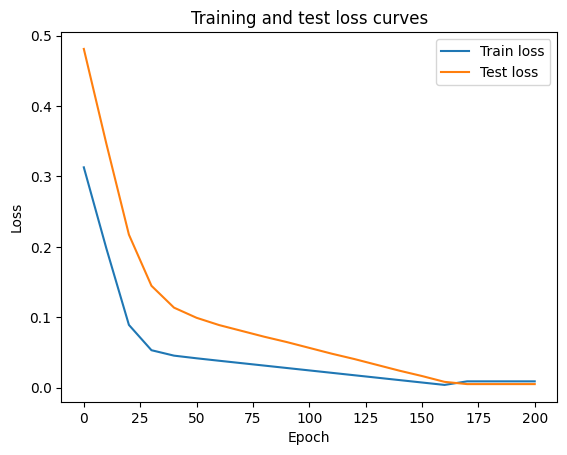

In [ ]:
import numpy as np
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

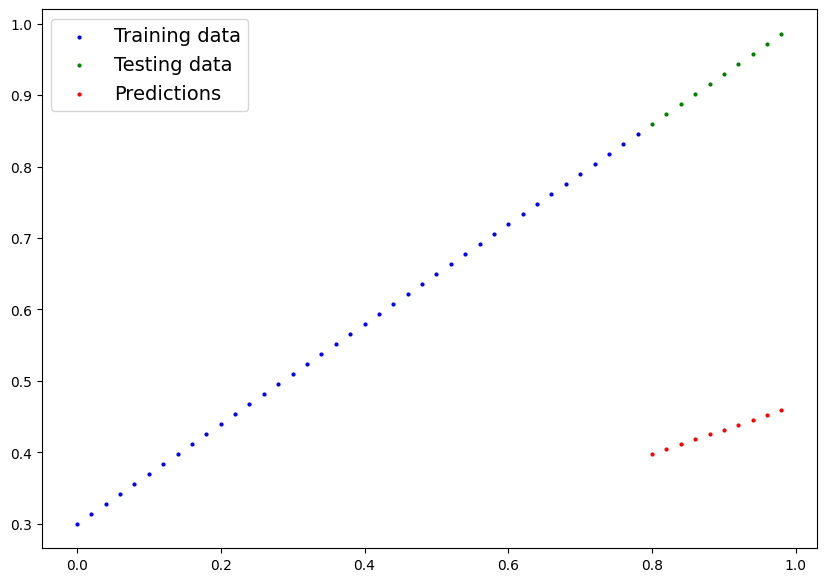

In [ ]:
plot_predictions(predictions=y_preds)     # Old Plot

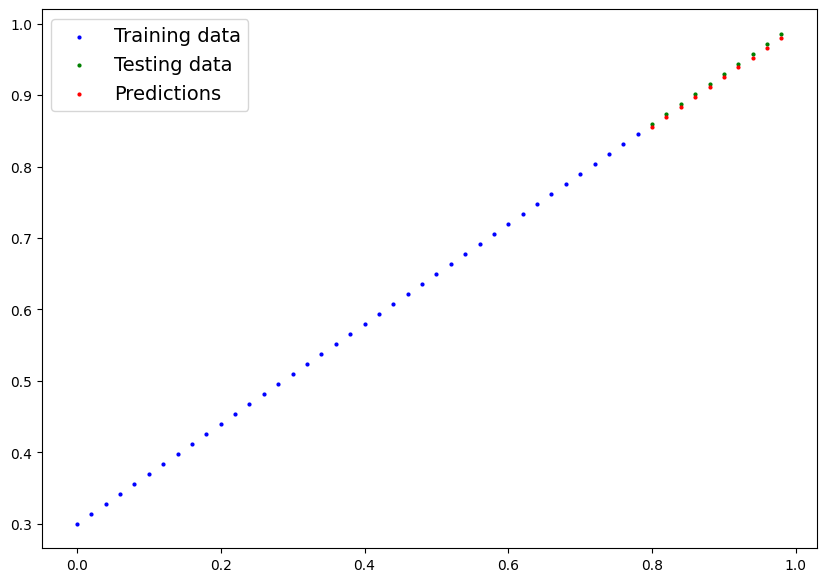

In [ ]:
plot_predictions(predictions=test_pred)   # New Plot

## Saving a model in PyTorch
Serializing - Saving

De-serializing - Loading

There are 3 main methods for saving and loading models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Pythons's pickle format.
https://docs.python.org/3/library/pickle.html

2. `torch.load()` - allows you to load a saved object.

3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

**PyTorch saving and loading models:**
https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Aug 16 11:40 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [ ]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
# Compare loaded models preds with original model preds(this y_preds is un-trained model preds)
y_preds == loaded_model_preds

tensor([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False]])

In [ ]:
# Make some model preds with our original model (model before saving)
# This y_preds is trained models preds
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [ ]:
# Now compare again
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let's go back through the steps above and see it all in one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.1+cu118'

Create device agnostic code.

This means if we've got access to a GPU, our code will use it (for potentially faster computations).

If no GPU is available, the code will default to using GPU.

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


## 6.1 Data

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start=0
end=1
step=0.02

# Create X and y (features and labels)
X = torch.arange(start,end,step).unsqueeze(dim=1) # Without unsqueeze, errors will pop up.
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plot training data, test data, and predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size":14});

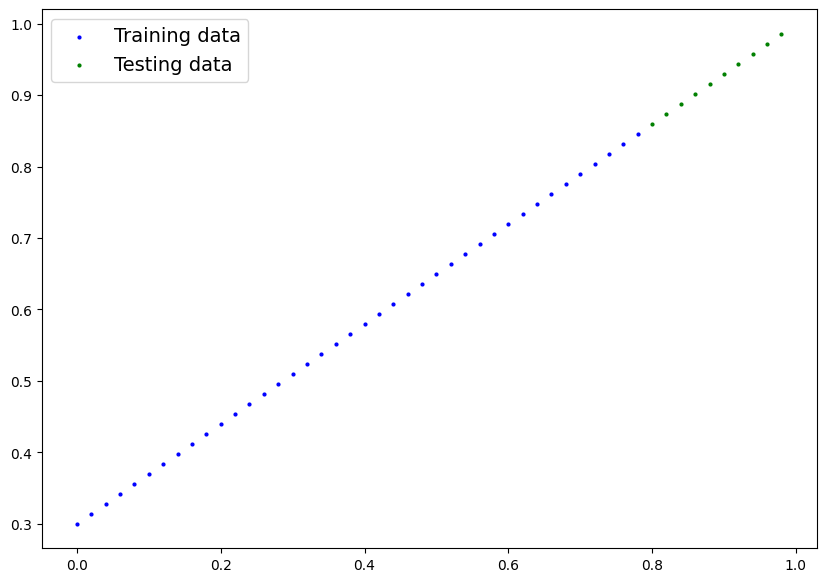

In [ ]:
# Plot the data
plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a PyTorch Linear Model using nn.Linear -> for creating model parameters (weight and bias)

torch.nn has many layers, here we are using Linear
https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [ ]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()

    # Use nn.Linear() for creating the model parameters / also called: linear transform, probing layer, fully connected layer, dense layer etc.
    # Using our own in-built layer which has in-built parameters (weight, bias etc) instead of explicitly defining weights and bias
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
    # The reason why in_features = 1 and out_features = 1 is because in X_train for every 1 value there is a corresponding 1 value in y_train. Check out the matrix layer using X_train[:5], y_train[:5]

  def forward(self, x: torch.Tensor) -> torch.Tensor:   # this just says that x should be a torch tensor and will return a torch tensor by passing x to nn.Linear with 1 input and 1 output feature.
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

The use of `next()` in the statement `next(model_1.parameters()).device` allows you to access the **first parameter** (or tensor) of the model `model_1`. Here's what is happening step by step:

---

### **Explanation of the Code**

1. **`model_1.parameters()`**:  
   - This method returns an **iterator** containing all the parameters (weights and biases) of the model.
   - These parameters are instances of `torch.nn.Parameter`, which are tensors that have the `.grad` attribute to store gradients.

2. **`next(model_1.parameters())`**:  
   - The `next()` function retrieves the **first element** from the iterator returned by `model_1.parameters()`.

3. **`.device`**:  
   - Once you get the first parameter (a tensor), the `.device` attribute tells you which device (CPU or GPU) that parameter is currently stored on.

---

### **Purpose of Using `next()`**

The main purpose is to **quickly check the device** (CPU or GPU) where the model's parameters are located. Since all the parameters of a model are typically stored on the same device, it is sufficient to check the device of the first parameter instead of iterating over all of them.

# 6.3 Training
For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup the loss function
loss_fn = nn.L1Loss() # Same as MAE


# Setup our optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

# Training Loop
torch.manual_seed(42)

epochs = 200

for epoch in range(epochs+1):
  model_1.train()

  # 1. Forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()   # Turns off things like dropout, batch norm layers etc, we don't have these for now, but generally it is a good practice.
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss: 0.013801801018416

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

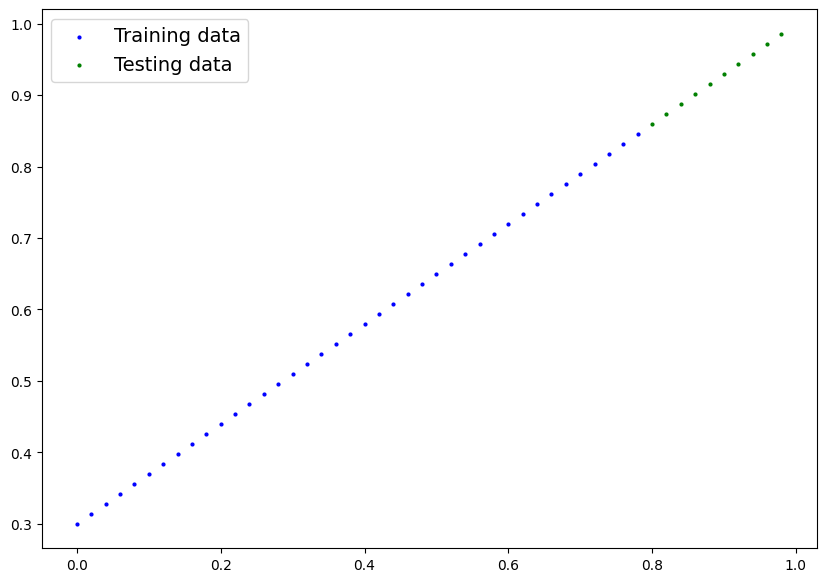

In [ ]:
plot_predictions()

## 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

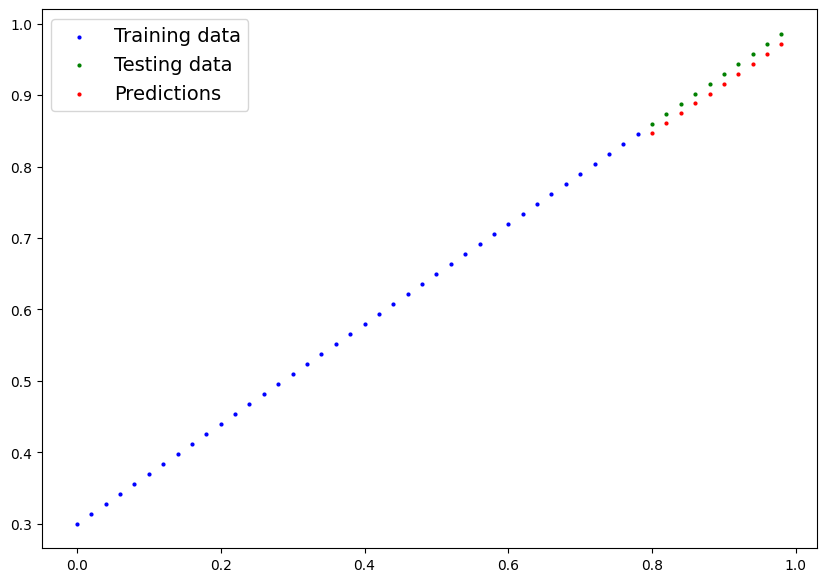

In [ ]:
# Check out our model's predictions visually
plot_predictions(predictions=y_preds.cpu())  # matplotlib works with numpy and numpy is always cpu based

## 6.5 Saving and loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: models/01_pytorch_workflow_model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
# Evaluate the loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

#### Manan Kumar